In [1]:
import sys
sys.path.append("../")
sys.path.append("../lib/")

sys.path

['C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\python36.zip',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\DLLs',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\lib',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64',
 '',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32\\lib',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\Pythonwin',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\lib\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\IPython\\extensions',
 'C:\\Users\\Previato\\.ipython',
 '../',
 '../lib/']

In [2]:
import src.enviroment2 as enviroment
import src.pacman_problem as pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
import time
import random
import yaml
warnings.filterwarnings("ignore")

In [3]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140]}

maze_ghost_n = {'Mazes/TinyMaze01.txt':3,
                'Mazes/SmallMaze01.txt':9,
             'Mazes/SmallMaze02.txt':9,
             'Mazes/MediumMaze01.txt':24,
             'Mazes/MediumMaze02.txt':24,
             'Mazes/BigMaze01.txt':45,
             'Mazes/BigMaze02.txt':45}

In [4]:
rng = np.random.default_rng()

i_max = 3
j_max = 3
k_max = 3

for maze_name in maze_arqs:
    # Start maze
    i = 0
    while i < i_max:
        maze, _, _ = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])

        # Generate ghosts
        ghosts_pos = []
        while len(ghosts_pos) < maze_ghost_n[maze_name]:
            pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
            if maze.is_allowed(pos):
                ghosts_pos.append(pos)

        # Check if is solvable given a random initial/goal positions
        init_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
        while not maze.is_allowed(init_pos):
            init_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))

        goal_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
        while not maze.is_allowed(goal_pos):
            goal_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))

        problem = pacman.PacmanProblem(maze, init_pos, goal_pos)
        solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem)

        if solution_node is None:
            # No solution available
            continue

        print(ghosts_pos)
        ghost_arq = maze_name.split('.')[0] + "_ghosts_" + str(i) + ".yaml"
        output = yaml.dump(ghosts_pos)
        with open(ghost_arq, 'w') as f:
            f.write(output)
        
        # Create more possible init/goal positions
        valid_pos = []
        j = 0
        while j < j_max:
            init_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
            while not maze.is_allowed(init_pos):
                init_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
            
            attempts = 0
            k = 0
            while k < k_max:
                if attempts > 15:
                    break;
                
                goal_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
                while not maze.is_allowed(goal_pos):
                    goal_pos = tuple(rng.integers([0, 0], maze_arqs[maze_name], 2))
                
                problem = pacman.PacmanProblem(maze, init_pos, goal_pos)
                solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem)
                if solution_node is None:
                    attempts += 1
                    continue
                
                attempts = 0
                valid_pos.append([init_pos, goal_pos])
                k += 1
            
            # If there were too many attempts we reset the init pos
            if attempts > 15:
                continue;
            
            # Go to next init pos
            j += 1
            
        print(len(valid_pos))
        print(valid_pos)
        pos_arq = maze_name.split('.')[0] + "_pos_" + str(i) + ".yaml"
        output = yaml.dump(valid_pos)
        with open(pos_arq, 'w') as f:
            f.write(output)
        
        # Go to a new ghost selection for the same maze
        
        i += 1

[(9, 8), (16, 18), (24, 9)]
9
[[(21, 3), (12, 6)], [(21, 3), (13, 6)], [(21, 3), (16, 15)], [(1, 12), (21, 26)], [(1, 12), (28, 12)], [(1, 12), (24, 9)], [(26, 1), (9, 6)], [(26, 1), (9, 4)], [(26, 1), (9, 10)]]
[(1, 23), (24, 4), (6, 4)]
9
[[(5, 7), (20, 12)], [(5, 7), (21, 10)], [(5, 7), (21, 18)], [(9, 18), (24, 3)], [(9, 18), (12, 23)], [(9, 18), (18, 25)], [(18, 18), (24, 26)], [(18, 18), (27, 26)], [(18, 18), (16, 16)]]
[(17, 26), (13, 21), (14, 11)]
9
[[(24, 26), (9, 17)], [(24, 26), (6, 24)], [(24, 26), (18, 12)], [(12, 11), (1, 26)], [(12, 11), (10, 1)], [(12, 11), (22, 9)], [(3, 16), (17, 23)], [(3, 16), (15, 5)], [(3, 16), (28, 5)]]
[(28, 1), (18, 15), (24, 8), (1, 16), (11, 59), (1, 1), (21, 48), (12, 58), (12, 16)]
9
[[(28, 5), (22, 77)], [(28, 5), (15, 52)], [(28, 5), (23, 77)], [(15, 12), (10, 56)], [(15, 12), (2, 74)], [(15, 12), (15, 62)], [(15, 11), (21, 43)], [(15, 11), (19, 15)], [(15, 11), (12, 31)]]
[(13, 80), (5, 74), (13, 6), (18, 9), (28, 48), (4, 18), (2, 77),

[(18, 125), (69, 88), (70, 76), (15, 100), (60, 137), (10, 88), (15, 25), (51, 12), (3, 100), (62, 84), (48, 102), (58, 11), (88, 72), (1, 119), (42, 87), (66, 23), (29, 125), (33, 73), (9, 39), (74, 72), (9, 28), (24, 44), (61, 27), (74, 46), (55, 0), (75, 98), (14, 98), (39, 83), (22, 103), (33, 133), (58, 56), (54, 123), (66, 61), (7, 27), (28, 23), (13, 106), (21, 47), (51, 14), (42, 125), (85, 84), (25, 83), (22, 58), (76, 1), (61, 91), (79, 49)]
9
[[(82, 109), (15, 32)], [(82, 109), (31, 111)], [(82, 109), (58, 61)], [(40, 114), (88, 106)], [(40, 114), (5, 91)], [(40, 114), (42, 46)], [(30, 18), (88, 9)], [(30, 18), (60, 118)], [(30, 18), (69, 14)]]


In [5]:
maze_name = 'Mazes/MediumMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (-1, -1)
Goal position: (-1, -1)


In [21]:
initial_position

(12, 0)

In [22]:
goal_position

(1, 55)

In [16]:
initial_position = (12, 0)
goal_position = (1, 55)

In [5]:
enviroment.set_ghost("Mazes/MediumMaze01_0.yaml", maze)

FileNotFoundError: [Errno 2] No such file or directory: 'Mazes/MediumMaze01_0.yaml'

In [14]:
tam_plot = 30
mazeName_plot = maze_name[6:maze_name.index('.')]

In [19]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [9]:
def make_grid_plot(maze, initial_position, goal_position, maze_name):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)

    plt.savefig("Figure/"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
def make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = 'hot'

    im = ax.imshow(maze.shockwave_grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.savefig("Figure/"+mazeName_plot+str(initial_position)+str(goal_position)+ 'SW.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
def make_path_plot(maze, initial_position, goal_position, node, maze_name, alg):    
    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    
    plt.savefig("Figure/"+alg+"Path_"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    

In [12]:
enviroment.set_ghost("Mazes/MediumMaze01_0.yaml", maze)

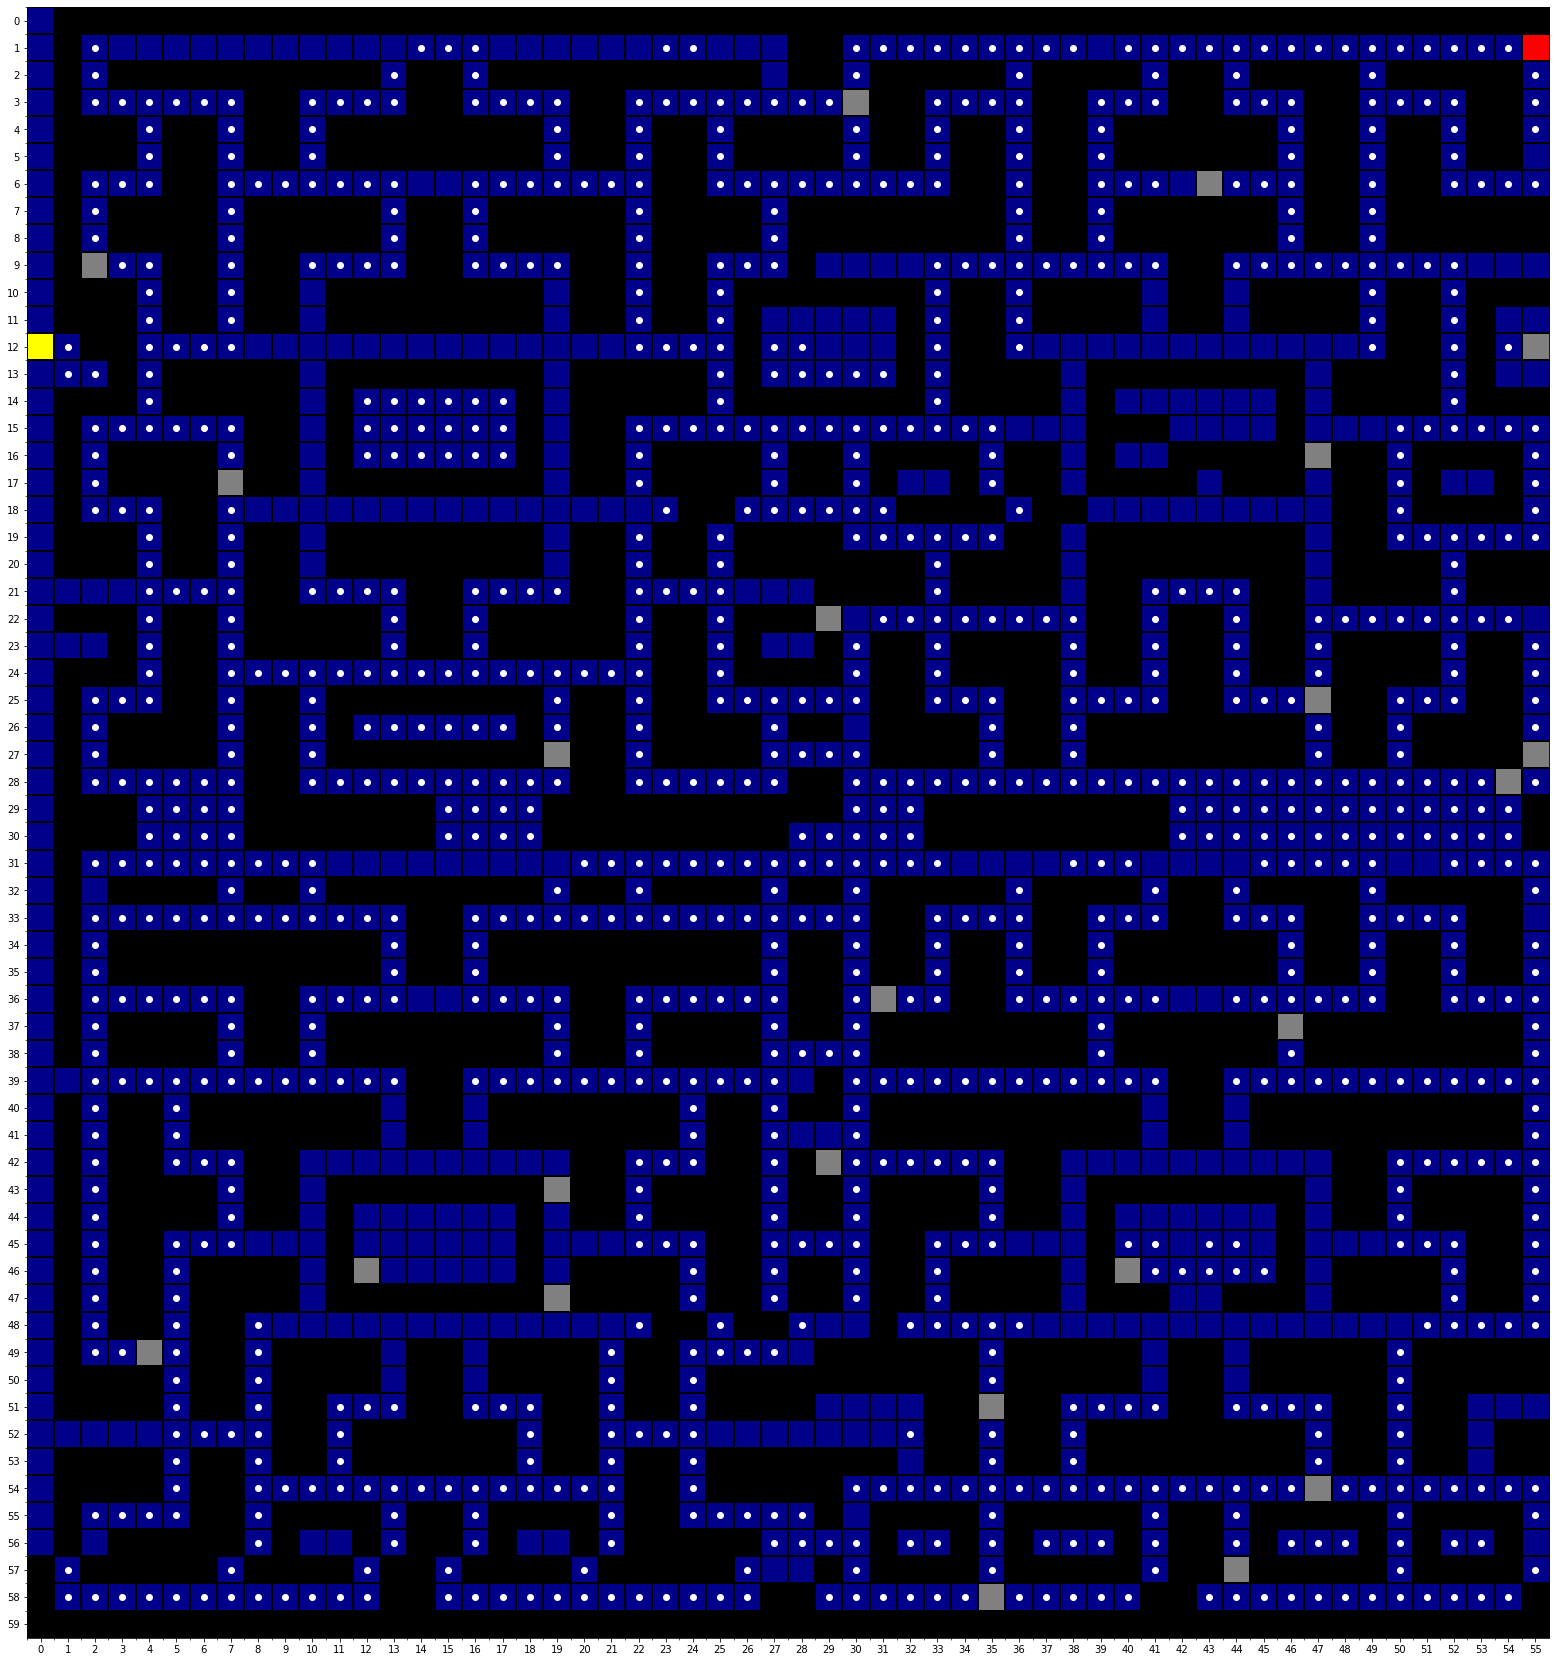

In [17]:
make_grid_plot(maze, initial_position, goal_position, mazeName_plot)

In [23]:
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

Tempo execução:  0.02800583839416504
Maximum number of nodes in memory at same time:  9
Number of expanded nodes:
31
Number of expanded food nodes:
20
Number of nodes in the path:
25
Number of food nodes in the path:
18
------------------------------------------------
[<Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>]
Path:
[<Node (12, 0)>, <Node (11, 0)>, <Node (10, 0)>, <Node (9, 0)>, <Node (9, 55)>, <Node (9, 54)>, <Node (9, 53)>, <Node (9, 52

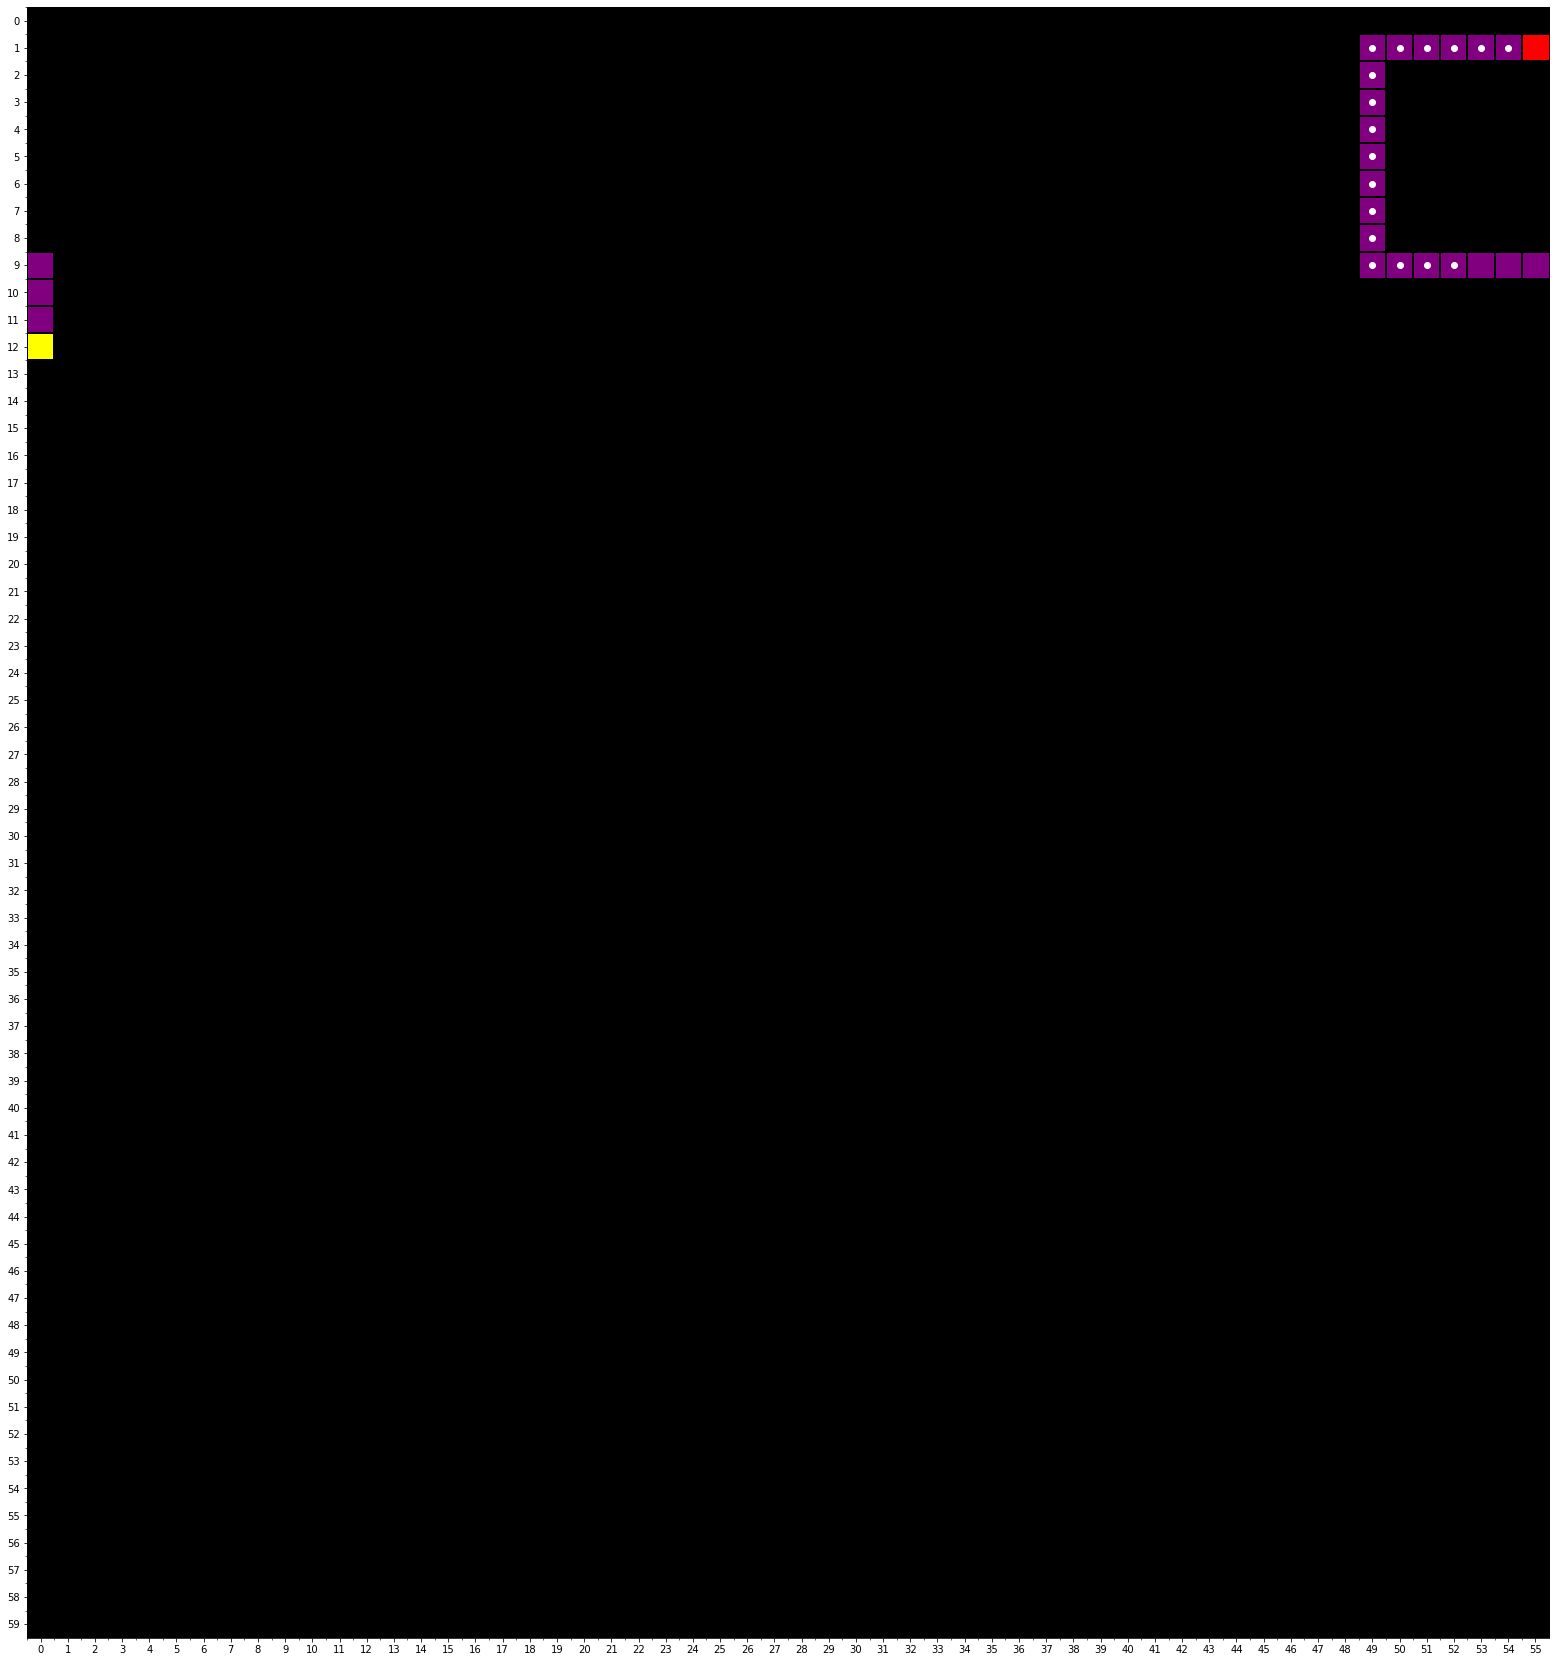

In [24]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-MD")